# Test Utils for sBERT-RETR study
## Clusterability tests
## The functionality is implemented in the python file: clusterability.py

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [2]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/RTER')

In [3]:
import clusterability as clus

In [4]:
iris = datasets.load_iris()
iris.data.shape

(150, 4)

In [5]:
from sklearn.decomposition import PCA 

In [6]:
iris.data_pca = PCA(n_components=2).fit_transform(iris.data)

In [7]:
kls_vals = clus.spaHist(iris.data_pca)

In [8]:
kls_vals.mean()

1.1700843622883317

(array([  1.,  11.,  37., 105., 124.,  96.,  68.,  40.,  12.,   6.]),
 array([0.68748596, 0.78533958, 0.88319319, 0.98104681, 1.07890043,
        1.17675404, 1.27460766, 1.37246128, 1.47031489, 1.56816851,
        1.66602213]),
 <a list of 10 Patch objects>)

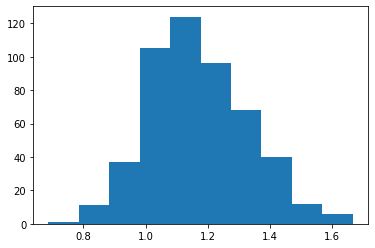

In [9]:
plt.hist(kls_vals)

(array([55., 12.,  9.,  7.,  4.,  3.,  5.,  3.,  1.,  1.]),
 array([0.   , 0.006, 0.012, 0.018, 0.024, 0.03 , 0.036, 0.042, 0.048,
        0.054, 0.06 ]),
 <a list of 10 Patch objects>)

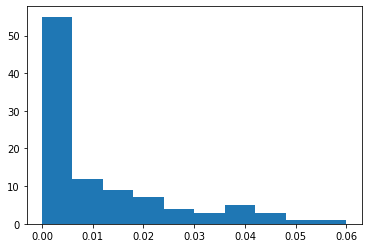

In [10]:
plt.hist(clus.getEPMF(iris.data_pca, bins=10))

<BarContainer object of 25 artists>

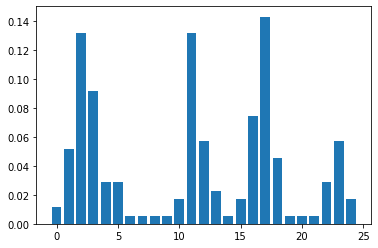

In [11]:
plt.bar(np.arange(25), clus.getEPMF(iris.data_pca, bins=5, smoothing=True))

<BarContainer object of 25 artists>

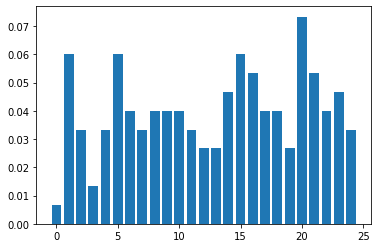

In [14]:
plt.bar(np.arange(25), clus.getEPMF(clus.getRandomArray(iris.data_pca, iris.data_pca.shape[0])))

<BarContainer object of 25 artists>

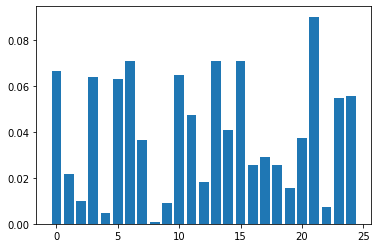

In [16]:
plt.bar(range(0, 25), clus.randEPMF())

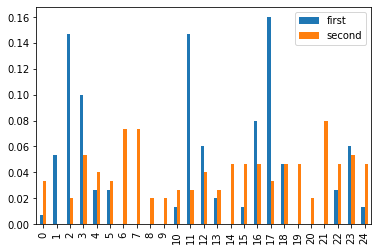

In [18]:
import pandas as pd
bar_df = pd.DataFrame({'first':clus.getEPMF(iris.data_pca), 
                       'second':clus.getEPMF(clus.getRandomArray(iris.data_pca, iris.data_pca.shape[0]))})
bar_df.plot(kind="bar")

In [20]:
clus.computeKLConv(bar_df['first'], bar_df['second'])

inf

In [22]:
# Test spaHist()  on the iris.data
kls_vals = clus.spaHist(iris.data_pca, n=1000)

In [23]:
kls_vals.mean()

1.1803891348048174

(array([  3.,   1.,   5.,  21.,  27.,  51.,  64.,  83., 105.,  95., 123.,
         84.,  90.,  63.,  58.,  42.,  24.,  19.,  17.,   7.,   7.,   4.,
          3.,   2.,   2.]),
 array([0.73826273, 0.77987141, 0.8214801 , 0.86308878, 0.90469747,
        0.94630615, 0.98791484, 1.02952352, 1.07113221, 1.11274089,
        1.15434958, 1.19595826, 1.23756695, 1.27917563, 1.32078432,
        1.362393  , 1.40400169, 1.44561037, 1.48721906, 1.52882774,
        1.57043642, 1.61204511, 1.65365379, 1.69526248, 1.73687116,
        1.77847985]),
 <a list of 25 Patch objects>)

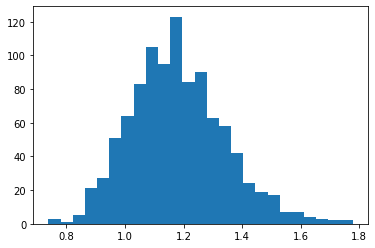

In [25]:
plt.hist(kls_vals, bins=25)

# Hopkins Statistic

The Hopkins statistic is a sparse test for spatial randomness. Given a dataset $\mathbf{D}$ comprising $n$ points, we generate $t$ random susamples $\mathbf{R}_{i}$ of $m$ points each, where $m<<n$. These samples are drawn from the same data space as $\mathbf{D}$, generated uniformly at random along each dimension. Further, we also generate $t$ subsamples of $m$ points directly from $\mathbf{D}$, using sampling without replacement. 

Let $\mathbf{D}_{i}$ denote the $i$th direct subsample. Next, we compute the minimum distance between each points $\mathbf{x}_{j}\in \mathbf{D}_{i}$ and points in $\mathbf{D}$

$$\delta_{min}(\mathbf{x}_{j})=\min_{\mathbf{x}_{i}\in D, \mathbf{x}_{i}\neq \mathbf{x}_{j}}\left\{ \left\Vert \mathbf{x}_{j}-\mathbf{x}_{i} \right\Vert \right\}$$
Likewise, we compute the minimum distance $\delta_{min}(\mathbf{y}_{j})$ between a point $\mathbf{y}_{j}\in \mathbf{R}_{i}$ and points in $\mathbf{D}$.

The Hopkins statistic (in $d$ dimensions) for the $i$th pair of samples $\mathbf{R}_{i}$ and $\mathbf{D}_{i}$ is then defined as 
$$ HS_{i}=\frac{\Sigma_{\mathbf{y}_{j}\in \mathbf{R}_{i}} (\delta_{min}(\mathbf{y}_{j}))^d}{\Sigma_{\mathbf{y}_{j}\in \mathbf{R}_{i}}(\delta_{min}(\mathbf{y}_{j}))^d + \Sigma_{\mathbf{x}_{j}\in \mathbf{D}_{i}}(\delta_{min}(\mathbf{x}_{j}))^d} $$

This statistic compares the nearest-neighbors distribution of randomly generated points to the same distribution for random subsets of points from $\mathbf{D}$. If the data is well clustered we expect $\delta_{min}(\mathbf{x}_{j})$ values to be smaller compared to the $\delta_{min}(\mathbf{y}_{j})$  values, and in this case $HS_{i}$ tends to be 1. If both nearest-neighbor distances are similar, then $HS_{i}$ takes on values close to 0.5, which indicates that the data is essentially random, and there is no apparent clustering. Finally, if $\delta_{min}(\mathbf{x}_{j})$ values are larger compared to $\delta_{min}(\mathbf{y}_{j})$ values, then $HS_{i}$ tends to 0, and it indicates the point repulsion, with no clustering. From the $t$ different values of $HS_{i}$ we may then compute the mean and variance of the statistic to determne whether $\mathbf{D}$ is clusterable or not. 

In [24]:
iris.data.shape

(150, 4)

In [26]:
Di, idxs = clus.generateDirectSample(iris.data, 30)

In [ ]:
computeMinDistances(Di, iris.data, idxs=idxs)

array([0.2236068 , 0.1       , 0.17320508, 0.14142136, 0.14142136,
       0.36055513, 0.14142136, 0.3       , 0.28284271, 0.1       ,
       0.48989795, 0.14142136, 0.28284271, 0.14142136, 0.14142136,
       0.2236068 , 0.14142136, 0.33166248, 0.1       , 0.14142136,
       0.14142136, 0.2       , 0.34641016, 0.26457513, 0.41231056,
       0.42426407, 0.34641016, 0.55677644, 0.14142136, 0.14142136])

In [28]:
Di, idxs = clus.generateDirectSample(iris.data_pca, 30)

In [30]:
clus.computeMinDistances(Di, iris.data_pca, idxs=idxs)

array([0.07914501, 0.06202317, 0.13679858, 0.16395577, 0.07503638,
       0.16643795, 0.13679858, 0.13046909, 0.07395631, 0.18571217,
       0.14596125, 0.09720004, 0.14700745, 0.13679858, 0.07494725,
       0.08509426, 0.15210287, 0.10247588, 0.08573019, 0.00438546,
       0.08509426, 0.09303885, 0.15598127, 0.08573019, 0.09517224,
       0.07503638, 0.17192121, 0.13046909, 0.15447291, 0.0310067 ])

In [49]:
Ri = clus.getRandomArray(iris.data_pca, 30)

In [50]:
Ri.shape

(30, 2)

In [51]:
dists_Ri = clus.computeMinDistances(Ri, iris.data_pca)

In [52]:
np.sum(np.power(dists_Ri, 2))

8.459867107289368

In [37]:
clus.hopkins(iris.data_pca, 30)

0.9122668685712582

In [38]:
hopkins_num = []
for i in range(500):
    hopkins_num.append(clus.hopkins(iris.data_pca, 30))

(array([  2.,   0.,   4.,   6.,  21.,  33.,  74., 132., 156.,  72.]),
 array([0.79775119, 0.81572909, 0.83370699, 0.85168489, 0.8696628 ,
        0.8876407 , 0.9056186 , 0.9235965 , 0.94157441, 0.95955231,
        0.97753021]),
 <a list of 10 Patch objects>)

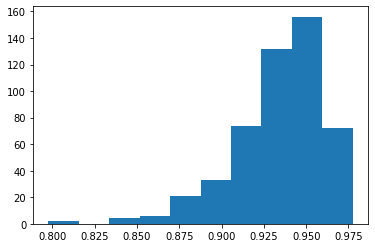

In [39]:
plt.hist(hopkins_num)

In [42]:
np.mean(hopkins_num)

0.9337548485241814

In [43]:
random_data = clus.getRandomArray(iris.data_pca, iris.data.shape[0])

In [44]:
hopkins_num = []
for i in range(500):
    hopkins_num.append(clus.hopkins(random_data, 30))

In [45]:
np.mean(hopkins_num)

0.44854935364561593

(array([  3.,  16.,  35.,  76., 110., 105.,  74.,  52.,  22.,   7.]),
 array([0.27158339, 0.30600036, 0.34041732, 0.37483428, 0.40925124,
        0.4436682 , 0.47808516, 0.51250213, 0.54691909, 0.58133605,
        0.61575301]),
 <a list of 10 Patch objects>)

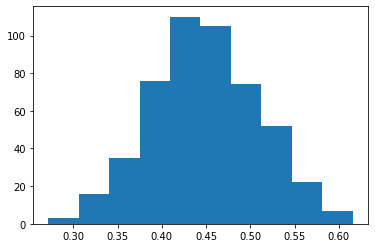

In [46]:
plt.hist(hopkins_num)